In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_21 = pd.read_csv("data/parcels_21_update.csv")
data_24 = pd.read_csv("data/parcels_24.csv")

/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_3407/800674983.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  data_21 = pd.read_csv("data/parcels_21_update.csv")
/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_3407/800674983.py:2: DtypeWarning: Columns (20,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data_24 = pd.read_csv("data/parcels_24.csv")


In [3]:
data_21.describe()

,PID,CM_ID,GIS_ID,UNIT_NUM,ZIPCODE,BLDG_SEQ,NUM_BLDGS,PTYPE,RES_FLOOR,CD_FLOOR,...,NEAR_DIST_Health,NEAR_DIST_Park,NEAR_DIST_Safety,NEAR_DIST_Security,NEAR_DIST_Subway,NEAR_DIST_University,SCHOOL_CNT,TREE_CNT,Latitude,Longitude
count,1.532590e+05,7.749400e+04,1.532590e+05,4.736200e+04,153259.000000,153209.000000,153209.000000,153259.000000,146118.000000,59620.000000,...,153259.000000,153259.000000,153259.000000,153259.000000,153259.000000,153259.000000,153259.000000,153259.000000,1.532590e+05,153259.000000
mean,1.183899e+09,9.543166e+08,1.183900e+09,8.767359e+03,2130.125298,1.001214,1.010371,160.482778,1.926132,3.923834,...,700.239441,102.590548,665.284390,1199.005381,1206.715141,1653.185784,5.454851,58.221821,2.943105e+06,767156.549264
std,7.078054e+08,6.974309e+08,7.078063e+08,1.858242e+06,31.917560,0.037179,0.233098,220.872197,1.252354,5.389555,...,499.443260,95.713259,387.943055,578.357812,789.432793,1124.764924,6.312433,66.869178,1.283128e+04,10584.526588
min,1.000010e+08,1.000190e+08,1.000010e+08,0.000000e+00,2026.000000,1.000000,1.000000,13.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,19.017227,0.000000,1.349142,0.000000,0.000000,2.909812e+06,744103.861021
25%,5.025981e+08,4.008410e+08,5.025980e+08,2.000000e+00,2120.000000,1.000000,1.000000,102.000000,1.000000,2.000000,...,336.838965,27.465959,377.751811,744.698324,665.311115,587.581092,0.000000,26.000000,2.931423e+06,758933.686068
50%,1.300151e+09,6.030820e+08,1.300151e+09,4.000000e+00,2127.000000,1.000000,1.000000,102.000000,2.000000,3.000000,...,582.150046,77.649953,604.314016,1137.070115,995.981892,1636.843977,3.000000,44.000000,2.946328e+06,769850.895744
75%,1.812670e+09,1.700924e+09,1.812670e+09,1.250000e+02,2131.000000,1.000000,1.000000,104.000000,2.500000,4.000000,...,909.186026,150.339506,877.579597,1639.673940,1606.132696,2432.072513,10.000000,70.000000,2.953012e+06,775133.804839
max,2.205668e+09,2.205665e+09,2.205668e+09,4.044054e+08,2467.000000,4.000000,47.000000,995.000000,62.000000,60.000000,...,5045.401807,607.659826,4573.766610,5667.925458,7129.865736,6982.951824,30.000000,1603.000000,2.968499e+06,799998.265513


In [5]:

print(data_21["BLDG_VALUE"].isna().sum()) 
print(data_24["BLDG_VALUE"].isna().sum()) 

15707
0


In [6]:
print(data_21["GROSS_AREA"].isna().sum()) 
print(data_24["GROSS_AREA"].isna().sum()) 

16713
10501


In [7]:
data_21["PID"] = data_21["PID"].astype(int)
data_24["PID"] = data_24["PID"].astype(int)


In [4]:
# change NEAR_DIST_Mixed_Culture_District to NEAR_DIST_Culture_District
data_21.rename(columns={"NEAR_DIST_Mixed_Culture_District": "NEAR_DIST_Culture_District"}, inplace=True)
data_24.rename(columns={"NEAR_DIST_Mixed_Culture_District": "NEAR_DIST_Culture_District"}, inplace=True)


In [5]:
# data_21.columns

for col in data_21.columns:
    print(col)

PID
CM_ID
GIS_ID
ST_NUM
ST_NAME
UNIT_NUM
CITY
ZIPCODE
BLDG_SEQ
NUM_BLDGS
PTYPE
LU
PTYPE_DESC
BLDG_TYPE
OWN_OCC
OWNER
MAIL_ADDRESSEE
MAIL_ADDRESS
MAIL_CITY
MAIL_STATE
MAIL_ZIPCODE
RES_FLOOR
CD_FLOOR
RES_UNITS
COM_UNITS
LAND_SF
GROSS_AREA
LIVING_AREA
LAND_VALUE
BLDG_VALUE
TOTAL_VALUE
GROSS_TAX
YR_BUILT
YR_REMODEL
STRUCTURE_CLASS
ROOF_STRUCTURE
ROOF_COVER
INT_WALL
EXT_FINISHED
INT_COND
EXT_COND
OVERALL_COND
BED_RMS
FULL_BTH
HLF_BTH
KITCHEN
TT_RMS
BDRM_COND
BTHRM_STYLE1
BTHRM_STYLE2
BTHRM_STYLE3
KITCHEN_TYPE
KITCHEN_STYLE1
KITCHEN_STYLE2
KITCHEN_STYLE3
HEAT_TYPE
HEAT_FUEL
AC_TYPE
FIRE_PLACE
PLUMBING
NUM_PARKING
PROP_VIEW
CORNER_UNIT
parcels_21_prelim_OBJECTID
MAP_PAR_ID
BPDA_Name
LU_DESC
Address
Shape_Length
Shape_Area
BUS_CNT
NEAR_DIST_Culture
NEAR_DIST_Culture_District
NEAR_DIST_Health
NEAR_DIST_Park
NEAR_DIST_Safety
NEAR_DIST_Security
NEAR_DIST_Subway
NEAR_DIST_University
SCHOOL_CNT
TREE_CNT
Latitude
Longitude


In [6]:
data_21["OVERALL_COND"].unique()

array(['A - Average', 'P - Poor', 'G - Good', nan, 'F - Fair',
       'E - Excellent', 'VG - Very Good', 'EX - Excellent',
       'US - Unsound', 'VP - Very Poor', 'AVG - Default - Average'],
      dtype=object)

In [7]:
data_21["OVERALL_COND"].isnull().sum()

np.int64(9127)

In [8]:
data_21["LU"].unique()

# drop the LU of "A"
# data_21 = data_21[data_21["LU"].isin(["R3", "R2", "R1", "R4"])]
data_21 = data_21[data_21["LU"].isin(['R1', 'R2', 'R3', 'R4', "A", "CD", "CM", "RC"])]

# data_21["LU"].unique()

In [9]:
data_21["TOTAL_VALUE"]
# Drop rows with empty building values
data_21 = data_21.dropna(subset=['TOTAL_VALUE'])

print(data_21["GROSS_AREA"].isna().sum())

data_21 = data_21[data_21["GROSS_AREA"].notna()]


# data_21["OVERALL_COND"].isnull().sum()

# data_21 = data_21[data_21["OVERALL_COND"].notna()]


444


In [10]:
# check the bedroom nan portion
print(data_21["BED_RMS"].isnull().sum() / len(data_21))

# drop the bedroom nan
data_21 = data_21.dropna(subset=['BED_RMS'])

# check the bedroom nan portion
data_21["BED_RMS"].isnull().sum() / len(data_21)



0.07673005810882197


np.float64(0.0)

In [11]:
# count null values
data_21["TOTAL_VALUE"].isnull().sum()

np.int64(0)

In [12]:
intersecting_ids = set(data_21["PID"]) & set(data_24["PID"])

print(data_21["PID"].nunique())
print(data_24["PID"].nunique())
print(len(intersecting_ids))

125838
144021
120686


In [13]:
# we will get the bld_value of the 2024 data and add column to the data
# First filter data_24 to get matching PIDs, then map values using PID as key
data = data_21[data_21["PID"].isin(intersecting_ids)].copy()  # Use copy() to avoid SettingWithCopyWarning

# Create a mapping dictionary from data_24
value_map = data_24[data_24["PID"].isin(intersecting_ids)].set_index("PID")["TOTAL_VALUE"].to_dict()


inflation_2021 = 0.0470  # 4.70%
inflation_2022 = 0.0800  # 8.00%
inflation_2023 = 0.0412  # 4.12%



# Map the values using the dictionary
data["TOTAL_VALUE_2024"] = data["PID"].map(value_map)



In [14]:
# drop bldg value that are 0
data = data[data["TOTAL_VALUE"] != 0]
data = data[data["TOTAL_VALUE_2024"] != 0]


In [15]:
cumulative_inflation = (1 + inflation_2021) * (1 + inflation_2022) * (1 + inflation_2023)

data["TOTAL_VALUE_2024_2021_DOLLARS"] = data["TOTAL_VALUE_2024"] / cumulative_inflation

data["NOMINAL_INCREASE"] = data["TOTAL_VALUE_2024"] - data["TOTAL_VALUE"] 
data["REAL_INCREASE"] = data["TOTAL_VALUE_2024_2021_DOLLARS"] - data["TOTAL_VALUE"]

data["NOMINAL_INCREASE_PERCENT"] = (data["NOMINAL_INCREASE"] / data["TOTAL_VALUE"]) * 100
data["REAL_INCREASE_PERCENT"] = (data["REAL_INCREASE"] / data["TOTAL_VALUE"]) * 100

print(f"Cumulative inflation 2021-2024: {(cumulative_inflation - 1) * 100:.2f}%")
print("\nValue Change Summary:")
summary = data[["NOMINAL_INCREASE_PERCENT", "REAL_INCREASE_PERCENT"]].describe()
print(summary)

Cumulative inflation 2021-2024: 17.73%

Value Change Summary:
       NOMINAL_INCREASE_PERCENT  REAL_INCREASE_PERCENT
count             120158.000000          120158.000000
mean                  13.878326              -3.275504
std                   11.521937               9.786354
min                  -81.979784             -84.694222
25%                    7.106062              -9.027641
50%                   12.500000              -4.446208
75%                   19.409103               1.422156
max                  550.235110             452.288270


In [16]:
# Filter for properties with positive real value increases
positive_real_increases = data[data["REAL_INCREASE"] >= 0]

print("\nProperties with Real Value Increases:")
print(f"Count: {len(positive_real_increases)} ({(len(positive_real_increases)/len(data))*100:.1f}% of properties)")
print("\nSummary of Real Increases for Properties with Gains:")
print(positive_real_increases["REAL_INCREASE_PERCENT"].describe())



Properties with Real Value Increases:
Count: 37481 (31.2% of properties)

Summary of Real Increases for Properties with Gains:
count    37481.000000
mean         6.044458
std         11.206766
min          0.000265
25%          2.096398
50%          4.252259
75%          6.941534
max        452.288270
Name: REAL_INCREASE_PERCENT, dtype: float64


In [17]:
len(data)

120158

In [18]:
print(data["TOTAL_VALUE"].isna().sum())  

0


In [19]:
# count null building values
print(data["TOTAL_VALUE"].isna().sum())  
print(data["TOTAL_VALUE_2024"].isna().sum())

0
0


In [20]:
negative_real_increases = data[data["REAL_INCREASE"] < 0]

print("\nProperties with Real Value Increases:")
print(f"Count: {len(negative_real_increases)} ({(len(negative_real_increases)/len(data))*100:.1f}% of properties)")
print("\nSummary of Real Increases for Properties with Gains:")
print(negative_real_increases["REAL_INCREASE_PERCENT"].describe())



Properties with Real Value Increases:
Count: 82677 (68.8% of properties)

Summary of Real Increases for Properties with Gains:
count    82677.000000
mean        -7.500639
std          5.002536
min        -84.694222
25%         -9.892112
50%         -8.017780
75%         -3.713995
max         -0.000098
Name: REAL_INCREASE_PERCENT, dtype: float64


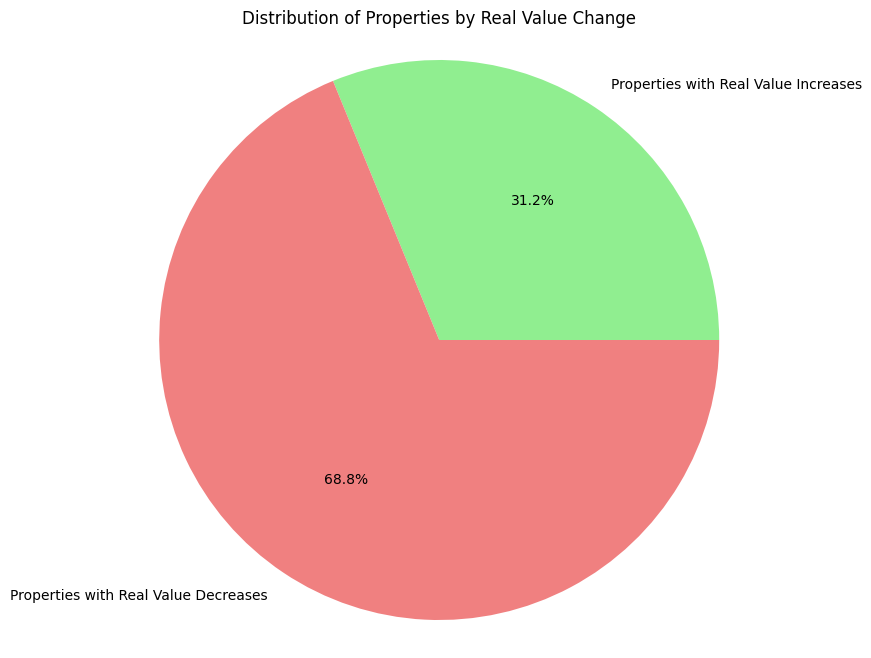

In [21]:
# Create a circular graph of the increase and decreased property count 

# Create a pie chart showing the proportion of properties with positive vs negative real increases
import matplotlib.pyplot as plt

# Calculate counts
negative_count = len(negative_real_increases)
positive_count = len(positive_real_increases)

# Create pie chart
plt.figure(figsize=(10,8))
plt.pie([positive_count, negative_count], 
        labels=['Properties with Real Value Increases', 'Properties with Real Value Decreases'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Properties by Real Value Change')
plt.axis('equal')
plt.show()


In [22]:
# sort the negative real increases by the absolute value of the real increase
negative_real_increases = negative_real_increases.sort_values(by="REAL_INCREASE_PERCENT", ascending=True)
# print the top 10
negative_real_increases[["TOTAL_VALUE", "TOTAL_VALUE_2024", "REAL_INCREASE", "REAL_INCREASE_PERCENT", "PID", "LU"]].head(10)
# print the bottom 10
# print(negative_real_increases.tail(10))


,TOTAL_VALUE,TOTAL_VALUE_2024,REAL_INCREASE,REAL_INCREASE_PERCENT,PID,LU
59631,2295200.0,413600.0,-1.943902e+06,-84.694222,801549004,CD
94705,1360200.0,284000.0,-1.118980e+06,-82.265826,1701569000,R3
84364,1064300.0,231524.0,-8.676511e+05,-81.523174,1501266000,R3
152278,879600.0,197800.0,-7.115952e+05,-80.899864,602642138,CD
43541,907900.0,220700.0,-7.204447e+05,-79.352869,600030016,CD
43537,890600.0,220700.0,-7.031447e+05,-78.951796,600030008,CD
152308,1039600.0,263800.0,-8.155370e+05,-78.447189,602642168,CD
45463,809800.0,211800.0,-6.299041e+05,-77.785140,601153014,CD
7740,870300.0,231969.0,-6.732732e+05,-77.361045,106807020,R3
45466,761600.0,213300.0,-5.804300e+05,-76.211924,601153020,CD


In [23]:
# save the data
data.to_csv("data/parcels_intersecting.csv", index=False)



In [24]:
len(data)

120158

In [37]:
# Cehck any null among x_columns
X_common = ["GROSS_AREA", "BED_RMS", "BUS_CNT", "NEAR_DIST_Health", "NEAR_DIST_Park", "NEAR_DIST_Safety", "NEAR_DIST_Security",\
                "NEAR_DIST_Subway", "NEAR_DIST_University", "SCHOOL_CNT", "TREE_CNT", "Latitude", "Longitude"]
culture_column = "NEAR_DIST_Culture"
mixed_culture_column = "NEAR_DIST_Culture_District"

# Remove Living Area NaN values
# data = data[data["LIVING_AREA"].notna()]
X1_cols = X_common + [culture_column]
X2_cols = X_common + [mixed_culture_column]

X_columns_null = [col for col in X1_cols if data[col].isnull().any()]
print(X_columns_null)

# fill in the null values with 0
data[X_columns_null] = data[X_columns_null].fillna(0)


[]


In [38]:
data["OVERALL_COND"].unique()

array(['A - Average', 'P - Poor', 'G - Good', nan, 'F - Fair',
       'E - Excellent', 'VG - Very Good', 'EX - Excellent'], dtype=object)

In [39]:
# # change overal cond to a categorical value 
# # Create a mapping dictionary for condition values to numeric scores
# label_to_int = {
#     'P - Poor': 0,
#     'F - Fair': 1,
#     'A - Average': 2,
#     'G - Good': 3,
#     'VG - Very Good': 4,
#     'E - Excellent': 5,
#     'EX - Excellent': 5  # Same meaning as 'E - Excellent'
# }

# # Map the conditions to numeric values, filling NaN with the median value of 5
# # only if the overall cond includes string

# if data['OVERALL_COND'].str.contains('G').any() or data['OVERALL_COND'].str.contains('P').any() or data['OVERALL_COND'].str.contains('F').any() or data['OVERALL_COND'].str.contains('A').any() or data['OVERALL_COND'].str.contains('E').any():
#     data['OVERALL_COND'] = data['OVERALL_COND'].map(label_to_int)
# # change value to numeric


In [40]:
# data['OVERALL_COND'].unique()

In [41]:
X1_cols

['GROSS_AREA',
 'BED_RMS',
 'BUS_CNT',
 'NEAR_DIST_Health',
 'NEAR_DIST_Park',
 'NEAR_DIST_Safety',
 'NEAR_DIST_Security',
 'NEAR_DIST_Subway',
 'NEAR_DIST_University',
 'SCHOOL_CNT',
 'TREE_CNT',
 'Latitude',
 'Longitude',
 'NEAR_DIST_Culture']

In [52]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import shap
from sklearn.utils import resample
from sklearn.metrics import r2_score
from tqdm.auto import trange   # progress bar

def bootstrap_xgb(X, y, B=300, random_state=0):
    rng = np.random.RandomState(random_state)
    n = len(y)
    r2_scores = np.empty(B)
    shap_means = np.zeros((B, X.shape[1]))  # mean |ϕ| per feature

    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    )

    for b in trange(B, desc="Bootstrapping"):
        # ----- 1. sample with replacement -----
        idx_boot = rng.choice(n, size=n, replace=True)
        idx_oob  = np.setdiff1d(np.arange(n), idx_boot)
        X_boot, y_boot = X.iloc[idx_boot], y.iloc[idx_boot]
        X_oob,  y_oob  = X.iloc[idx_oob],  y.iloc[idx_oob]

        # ----- 2. fit -----
        model.fit(X_boot, y_boot)

        # ----- 3. evaluate R² on OOB -----
        y_pred = model.predict(X_oob)
        r2_scores[b] = r2_score(y_oob, y_pred)

        # ----- 4. SHAP on OOB (TreeExplainer is fast) -----
        explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
        shap_vals = explainer.shap_values(X_oob, check_additivity=False)
        shap_means[b] = np.abs(shap_vals).mean(axis=0)

    return r2_scores, shap_means, X.columns


# ---------- run for the two specs ----------
Y = data["REAL_INCREASE_PERCENT"]

r2_a, shap_a, feat_a = bootstrap_xgb(data[X1_cols], Y, B=300, random_state=1)
r2_b, shap_b, feat_b = bootstrap_xgb(data[X2_cols], Y, B=300, random_state=1)

# delta distribution
delta_r2 = r2_b - r2_a
mean_delta = delta_r2.mean()
ci_delta   = np.percentile(delta_r2, [2.5, 97.5])
p_value    = np.mean(delta_r2 <= 0)

print(f"ΔR² mean = {mean_delta:.4f}, 95% CI [{ci_delta[0]:.4f}, {ci_delta[1]:.4f}], p = {p_value:.3f}")

Bootstrapping:   0%|          | 1/300 [00:51<4:14:48, 51.13s/it]


KeyboardInterrupt: 

In [ ]:
# -------------------------------------------------------------------
# 0.  Imports  (add only what you don't already have)
# -------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")        # journal‑friendly default
plt.rcParams["figure.dpi"] = 300  # crisp export

# -------------------------------------------------------------------
# 1.  Prepare helper variables
# -------------------------------------------------------------------
delta_r2 = r2_b - r2_a
k        = 10                     # top‑k features to display in bars / heat‑map
feature_names = feat_b            # same order as shap_b columns

# Pre‑compute statistics we’ll reuse
mean_b = shap_b.mean(axis=0)
std_b  = shap_b.std(axis=0)
top_idx = np.argsort(mean_b)[::-1][:k]   # indices of top‑k in Model B

# For rank‑stability heat‑map
rank_matrix = np.argsort(-shap_b, axis=1)[:, :k]         # (B, k) ranks
heat = np.zeros((k, k))                                 # rows=feature, cols=rank
for ranks in rank_matrix:
    for col, feat_i in enumerate(ranks):
        row = np.where(top_idx == feat_i)[0]
        if row.size:                                    # count only top‑k feats
            heat[row, col] += 1
heat = 100 * heat / shap_b.shape[0]                     # convert to %

# -------------------------------------------------------------------
# 2.  Build the four‑panel figure
# -------------------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# (A) R² distribution per model
sns.violinplot(data=[r2_a, r2_b],
               inner="box", palette=["lightgrey", "steelblue"],
               ax=axs[0, 0])
axs[0, 0].set_xticklabels(['Generic culture', 'Cultural‑district'])
axs[0, 0].set_ylabel('$R^2$')
axs[0, 0].set_title('(A) Predictive performance')

# (B) ΔR² distribution with CI line
sns.violinplot(y=delta_r2, color='lightgrey', inner=None, ax=axs[0, 1])
axs[0, 1].axhline(0, ls='--', c='k', lw=0.8)
ci = np.percentile(delta_r2, [2.5, 97.5])
axs[0, 1].plot([‑0.15, 0.15], [ci[0], ci[0]], c='r', lw=2)
axs[0, 1].plot([‑0.15, 0.15], [ci[1], ci[1]], c='r', lw=2)
axs[0, 1].set_xlim(‑0.4, 0.4)
axs[0, 1].set_ylabel('$\\Delta R^2$')
axs[0, 1].set_title('(B) Paired improvement\n95% CI [{:.3f}, {:.3f}]'.format(*ci))

# (C) Mean |SHAP| ± sd bar plot (Model B in colour, Model A in grey)
y_pos = np.arange(k)
axs[1, 0].barh(y_pos, mean_b[top_idx],   xerr=std_b[top_idx],
               color='steelblue', alpha=0.9, label='Model B')
axs[1, 0].barh(y_pos, shap_a.mean(0)[top_idx],
               color='lightgrey', alpha=0.6, label='Model A')
axs[1, 0].set_yticks(y_pos)
axs[1, 0].set_yticklabels(np.array(feature_names)[top_idx])
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Mean |SHAP| (OOB)')
axs[1, 0].set_title('(C) Feature importance stability')
axs[1, 0].legend(frameon=False)

# (D) Rank‑stability heat‑map
sns.heatmap(heat, annot=True, fmt='.0f', cmap='Blues',
            cbar_kws={'label':'% of bootstraps'},
            ax=axs[1, 1])
axs[1, 1].set_xlabel('Rank')
axs[1, 1].set_ylabel('Feature')
axs[1, 1].set_yticklabels(np.array(feature_names)[top_idx], rotation=0)
axs[1, 1].set_title('(D) How often a feature holds each rank')

plt.tight_layout()
plt.show()


In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold



# create a model to predict the real increase percent
Y = data["REAL_INCREASE_PERCENT"]
X = data[X1_cols]

# Initialize model with same parameters
# model = XGBRegressor(max_depth=11, n_estimators=2031, learning_rate=0.013,\
#     subsample=0.72, colsample_bytree=0.6, gamma=0.1, reg_lambda=1.95, reg_alpha=2.1,
#     min_child_weight=11)

model = XGBRegressor()


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)


Cross Validation Scores:
Fold 1: 0.4515
Fold 2: 0.3576
Fold 3: 0.3273
Fold 4: 0.4227
Fold 5: 0.3051

Mean CV Score: 0.3728
Standard Deviation: 0.0558

Feature importances:
[0.06315628 0.06841538 0.03113539 0.04113229 0.03536809 0.03015347
 0.02682971 0.04417037 0.05487896 0.02619508 0.03733344 0.42919686
 0.05428541 0.05774928]


In [43]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Latitude: 0.4292
BED_RMS: 0.0684
GROSS_AREA: 0.0632
NEAR_DIST_Culture: 0.0577
NEAR_DIST_University: 0.0549
Longitude: 0.0543
NEAR_DIST_Subway: 0.0442
NEAR_DIST_Health: 0.0411
TREE_CNT: 0.0373
NEAR_DIST_Park: 0.0354
BUS_CNT: 0.0311
NEAR_DIST_Safety: 0.0302
NEAR_DIST_Security: 0.0268
SCHOOL_CNT: 0.0262


100%|===================| 119672/120158 [02:58<00:00]        

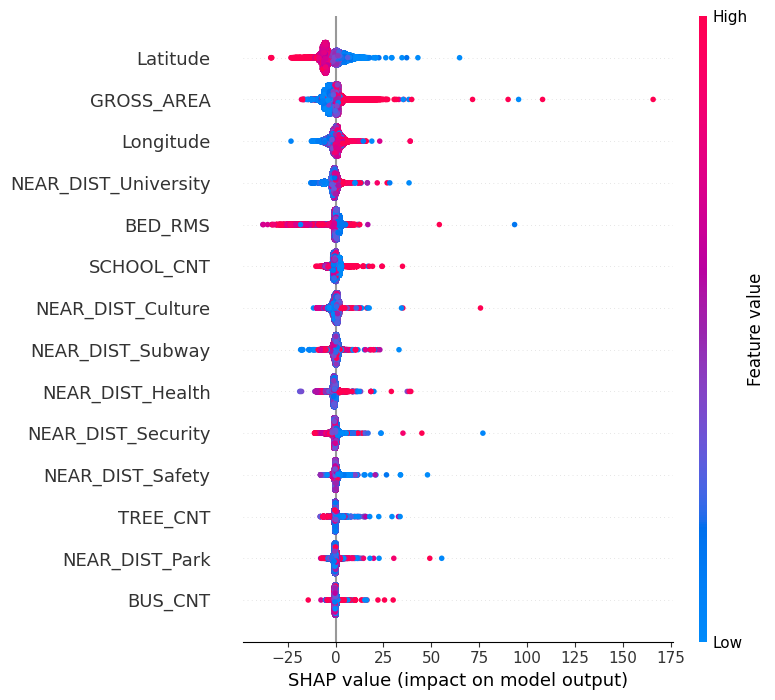

In [44]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Create SHAP summary plot
shap.summary_plot(shap_values, X)  # You can use "bar" for bar plot


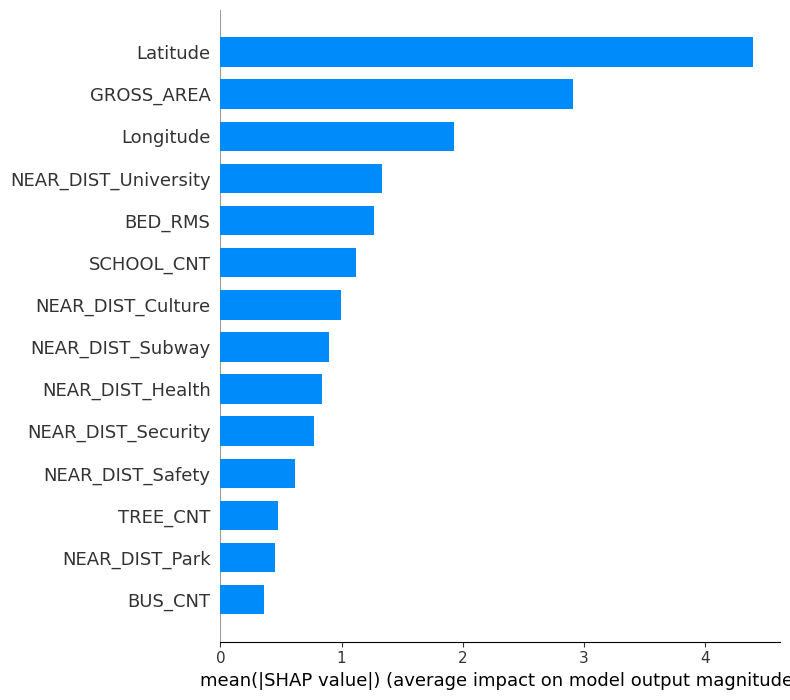

In [45]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values, X, plot_type="bar")

In [46]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
# save df
shap_df.to_csv('data/shap_values.csv', index=False)


In [47]:
len(data)

120158

In [48]:
# now we do with the mixed culture district
X = data[X2_cols]

# Initialize model with same parameters
model = XGBRegressor()


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)

Cross Validation Scores:
Fold 1: 0.4354
Fold 2: 0.3669
Fold 3: 0.3385
Fold 4: 0.4038
Fold 5: 0.2995

Mean CV Score: 0.3688
Standard Deviation: 0.0477

Feature importances:
[0.06351498 0.056681   0.03785402 0.04272822 0.04191365 0.03523917
 0.02912018 0.03766338 0.03305769 0.02393579 0.02527286 0.45038205
 0.05543514 0.06720186]


In [49]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Latitude: 0.4504
NEAR_DIST_Culture_District: 0.0672
GROSS_AREA: 0.0635
BED_RMS: 0.0567
Longitude: 0.0554
NEAR_DIST_Health: 0.0427
NEAR_DIST_Park: 0.0419
BUS_CNT: 0.0379
NEAR_DIST_Subway: 0.0377
NEAR_DIST_Safety: 0.0352
NEAR_DIST_University: 0.0331
NEAR_DIST_Security: 0.0291
TREE_CNT: 0.0253
SCHOOL_CNT: 0.0239


100%|===================| 119890/120158 [03:04<00:00]        

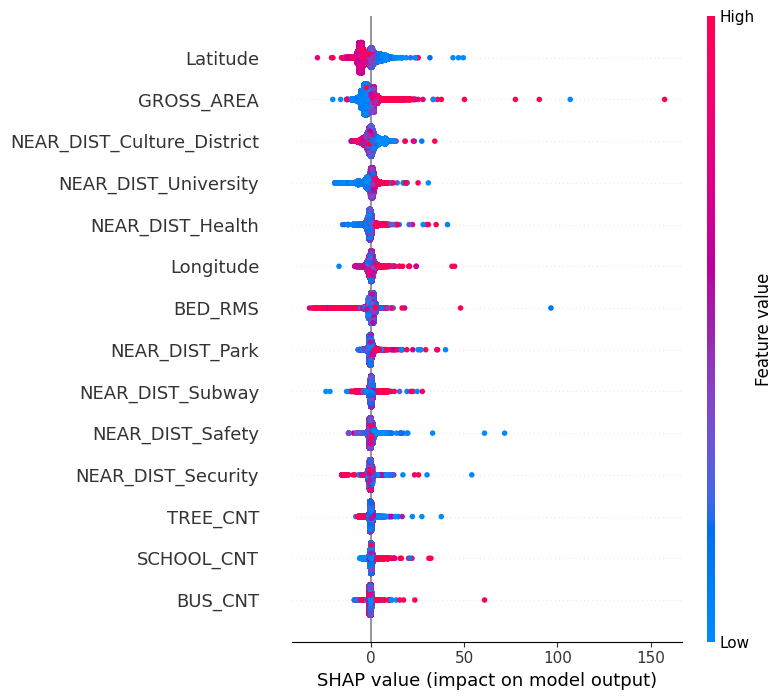

In [50]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Create SHAP summary plot
shap.summary_plot(shap_values, X)  # You can use "bar" for bar plot


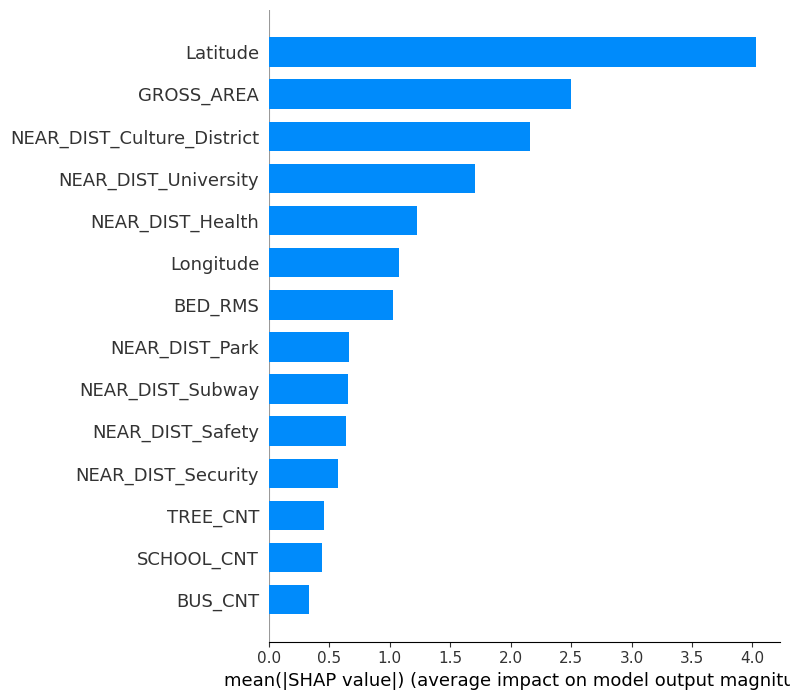

In [51]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values, X, plot_type="bar")

In [44]:
X_common

['GROSS_AREA',
 'BED_RMS',
 'BUS_CNT',
 'NEAR_DIST_Health',
 'NEAR_DIST_Park',
 'NEAR_DIST_Safety',
 'NEAR_DIST_Security',
 'NEAR_DIST_Subway',
 'NEAR_DIST_University',
 'SCHOOL_CNT',
 'TREE_CNT',
 'Latitude',
 'Longitude']

In [45]:
all_x = X_common + ["NEAR_DIST_Culture", "NEAR_DIST_Mixed_Culture_District"]

# now we do with all the data
X = data[all_x]

# Initialize model with same parameters
model = XGBRegressor()


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)

Cross Validation Scores:
Fold 1: 0.4637
Fold 2: 0.3671
Fold 3: 0.3309
Fold 4: 0.4191
Fold 5: 0.2842

Mean CV Score: 0.3730
Standard Deviation: 0.0633

Feature importances:
[0.05825448 0.05414545 0.02803902 0.04759371 0.0369596  0.02952042
 0.02624639 0.0394957  0.04015504 0.02289393 0.02368708 0.43998384
 0.05270435 0.05377636 0.04654453]


In [46]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Latitude: 0.4400
GROSS_AREA: 0.0583
BED_RMS: 0.0541
NEAR_DIST_Culture: 0.0538
Longitude: 0.0527
NEAR_DIST_Health: 0.0476
NEAR_DIST_Mixed_Culture_District: 0.0465
NEAR_DIST_University: 0.0402
NEAR_DIST_Subway: 0.0395
NEAR_DIST_Park: 0.0370
NEAR_DIST_Safety: 0.0295
BUS_CNT: 0.0280
NEAR_DIST_Security: 0.0262
TREE_CNT: 0.0237
SCHOOL_CNT: 0.0229


100%|===================| 119727/120158 [02:50<00:00]        

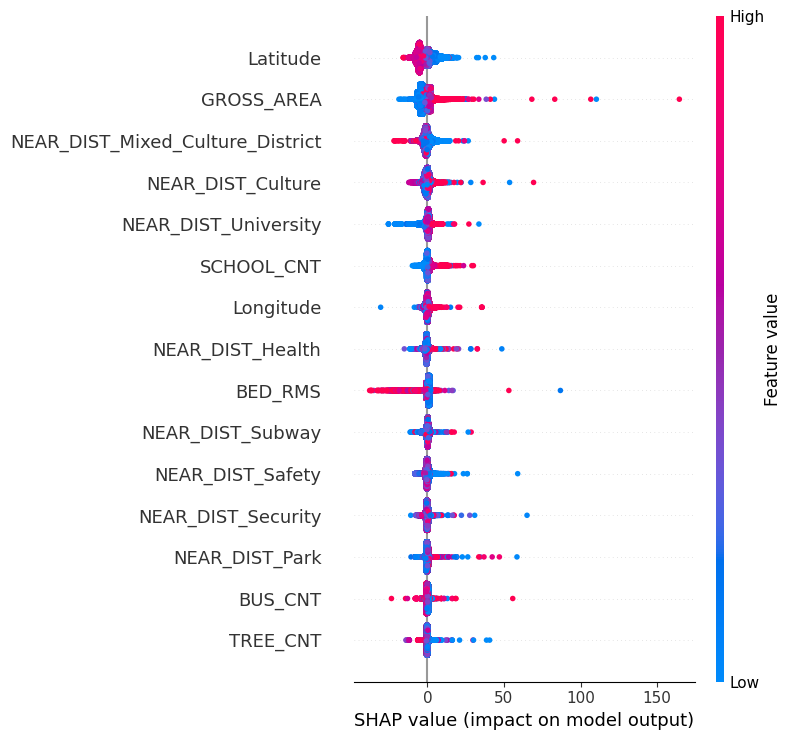

In [47]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Create SHAP summary plot
shap.summary_plot(shap_values, X)  # You can use "bar" for bar plot


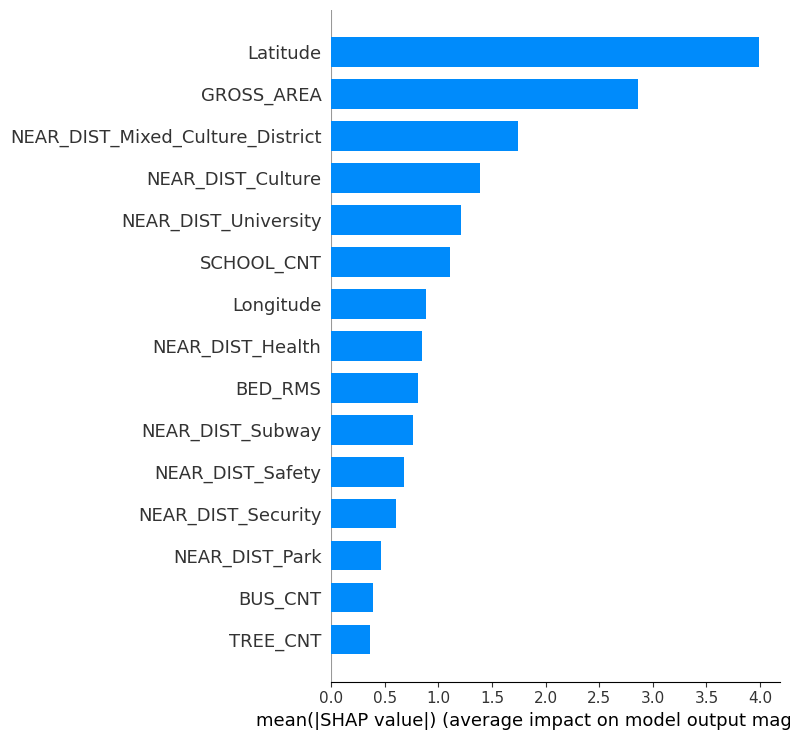

In [48]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values, X, plot_type="bar")